In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


# Function that normalizes a vector x (i.e. |x|=1 ) #########
# > numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)
#   This function is able to return one of eight different matrix norms,
#   or one of an infinite number of vector norms (described below),
#   depending on the value of the ord parameter.
#   Note: in the given functionm, U should be a vector, not a array.
#         You can write your own normalize function for normalizing
#         the colomns of an array.
def normalize(U):
    return U / LA.norm(U)


# display one face
def displayoneface(face, title=''):
    global image_count
    image_count += 1
    plt.figure(image_count)
    current_face = np.reshape(face, (64, 64), order='F')
    # image_count += 1
    # plt.figure(image_count)
    plt.title(title)
    plt.imshow(current_face, cmap=plt.cm.gray)

In [12]:
######### Load the data ##########

infile = open(r'G:\pythonalgos\faces.csv', 'r')
img_data = infile.read().strip().split('\n')
img = [map(int, a.strip().split(',')) for a in img_data]
pixels = []
for p in img:
    pixels += p
faces = np.reshape(pixels, (400, 4096))

######### Global Variable ##########

image_count = 0
faces

array([[ 75,  83,  83, ...,  42,  40,  38],
       [110, 108, 120, ...,  35,  33,  37],
       [ 77,  75,  65, ...,  37,  38,  37],
       ...,
       [121, 119, 113, ...,  41,  45,  46],
       [ 52,  49,  51, ..., 143, 144, 146],
       [125, 125, 125, ...,  96,  91,  93]])

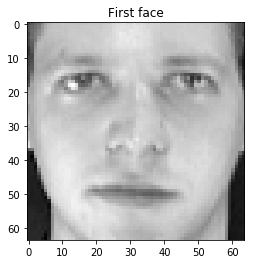

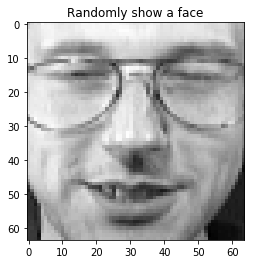

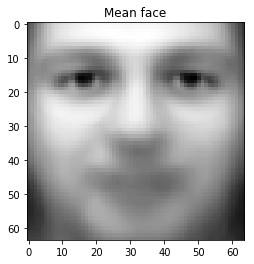

In [13]:
######### Display first face #########

# Useful functions:
# > numpy.reshape(a, newshape, order='C')
#   Gives a new shape to an array without changing its data.
# > matplotlib.pyplot.figure()
# 	Creates a new figure.
# > matplotlib.pyplot.title()
#	Set a title of the current axes.
# > matplotlib.pyplot.imshow()
#	Display an image on the axes.
#	Note: You need a matplotlib.pyplot.show() at the end to display all the figures.


showindex = 0
displayoneface(faces[showindex], title='First face')

########## display a random face ###########

# Useful functions:
# > numpy.random.choice(a, size=None, replace=True, p=None)
#   Generates a random sample from a given 1-D array
# > numpy.ndarray.shape()
#   Tuple of array dimensions.
#   Note: There are two ways to order the elements in an array:
#         column-major order and row-major order. In np.reshape(),
#         you can switch the order by order='C' for row-major(default),
#         or by order='F' for column-major.

showindex = int(np.random.rand() * 400)
displayoneface(faces[showindex], title='Randomly show a face')

########## compute and display the mean face ###########

# Useful functions:
# > numpy.mean(a, axis='None', ...)
#   Compute the arithmetic mean along the specified axis.
#   Returns the average of the array elements. The average is taken over
#   the flattened array by default, otherwise over the specified axis.
#   float64 intermediate and return values are used for integer inputs.

meanface = np.mean(faces, axis=0)
displayoneface(meanface, title='Mean face')

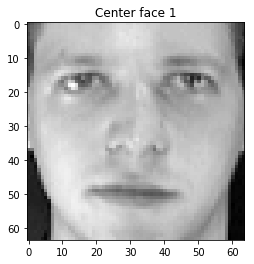

In [14]:
######### substract the mean from the face images and get the centralized data matrix A ###########

# Useful functions:
# > numpy.repeat(a, repeats, axis=None)
#   Repeat elements of an array.

centerfaces = (faces - np.reshape(np.repeat(meanface, faces.shape[0], axis=0), (400, 4096))) / 255
displayoneface(centerfaces[0], title='Center face 1')

# temp show image
plt.show()

In [15]:
######### calculate the eigenvalues and eigenvectors of the covariance matrix #####################

# Useful functions:
# > numpy.matrix()
#   Returns a matrix from an array-like object, or from a string of data.
#   A matrix is a specialized 2-D array that retains its 2-D nature through operations.
#   It has certain special operators, such as * (matrix multiplication) and ** (matrix power).

# > numpy.matrix.transpose(*axes)
#   Returns a view of the array with axes transposed.

# > numpy.linalg.eig(a)[source]
#   Compute the eigenvalues and right eigenvectors of a square array.
#   The eigenvalues, each repeated according to its multiplicity.
#   The eigenvalues are not necessarily ordered.

vmat = np.cov(np.matrix.transpose(np.matrix(centerfaces)))
vmat

array([[ 0.03668641,  0.03678022,  0.03680044, ..., -0.00191343,
        -0.00227285, -0.00257438],
       [ 0.03678022,  0.03771458,  0.0380717 , ..., -0.0020177 ,
        -0.00237758, -0.00271472],
       [ 0.03680044,  0.0380717 ,  0.03905982, ..., -0.00237742,
        -0.00277229, -0.00314804],
       ...,
       [-0.00191343, -0.0020177 , -0.00237742, ...,  0.03832901,
         0.03856061,  0.03803697],
       [-0.00227285, -0.00237758, -0.00277229, ...,  0.03856061,
         0.03994816,  0.0396578 ],
       [-0.00257438, -0.00271472, -0.00314804, ...,  0.03803697,
         0.0396578 ,  0.04110952]])

In [16]:
# !!!!! extreme time consuming
eigvals, eigvectors = LA.eig(vmat)
eigvals

array([ 3.84791841e+01+0.00000000e+00j,  1.75913070e+01+0.00000000e+00j,
        6.49143747e+00+0.00000000e+00j, ...,
       -1.86917731e-17+6.17774425e-18j, -1.86917731e-17-6.17774425e-18j,
       -1.62272699e-17+0.00000000e+00j])

In [37]:
########## Display the first 16 principal components ##################

k = 4096
sorted_indices = np.argsort(eigvals)
eigvals_top = np.real(eigvals[sorted_indices[:-k - 1:-1]])
eigvectors_top = np.real(eigvectors[:, sorted_indices[:-k - 1:-1]])

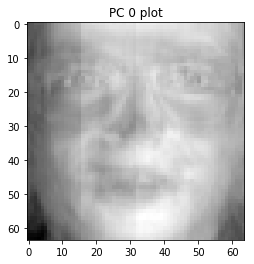

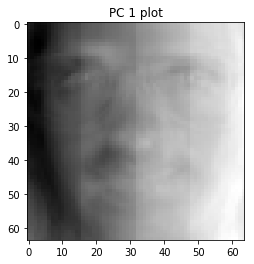

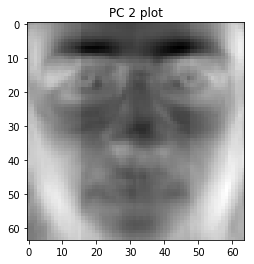

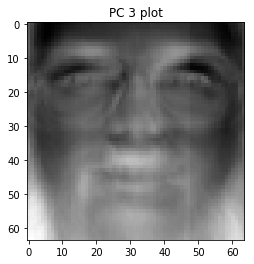

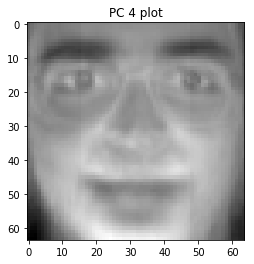

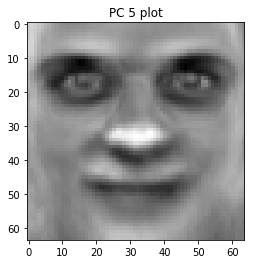

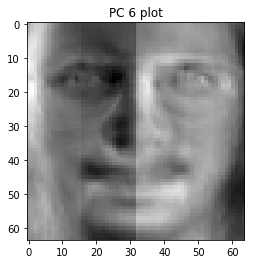

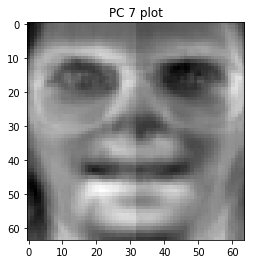

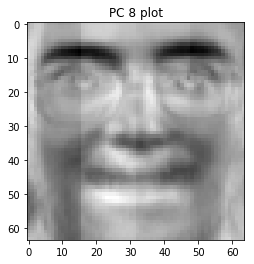

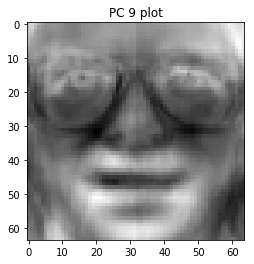

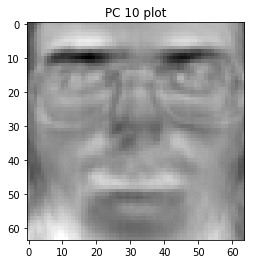

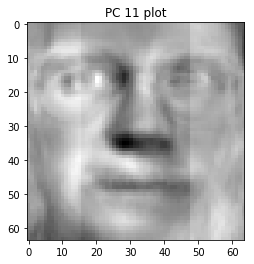

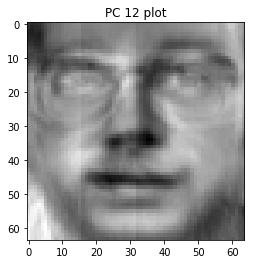

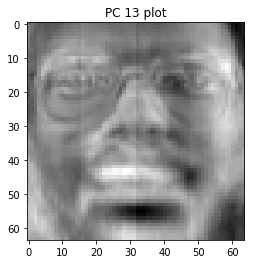

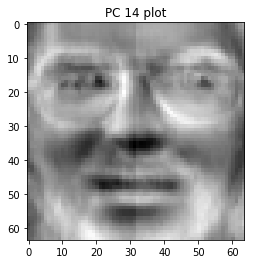

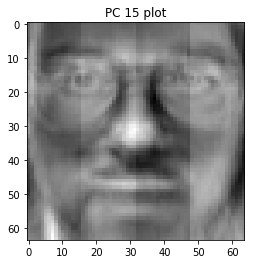

In [57]:
for i in range(16):
    displayoneface(eigvectors_top[:,i], 'PC '+str(i)+' plot')

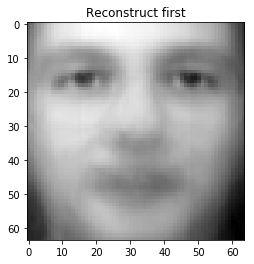

In [40]:
########## Reconstruct the first face using the first two PCs #########

recontime1 = 2
reconface1 = np.zeros(4096,dtype=np.float)
for i in range(recontime1):
    reconface1 += np.sum(centerfaces[0] * eigvectors_top[:, i]) * eigvectors_top[:, i]
reconface1 *= 255
reconface1 += meanface

displayoneface(reconface1, 'Reconstruct first')
plt.show()

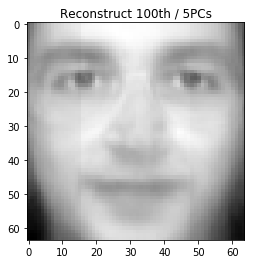

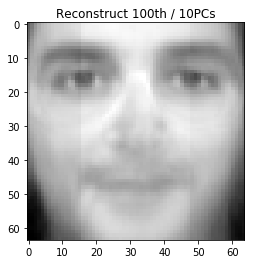

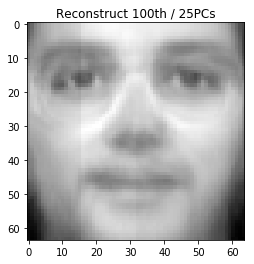

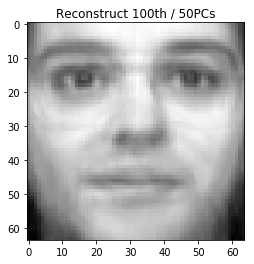

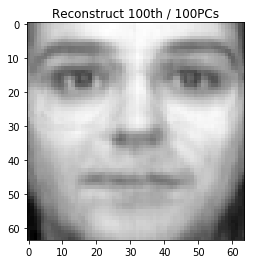

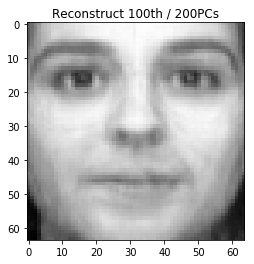

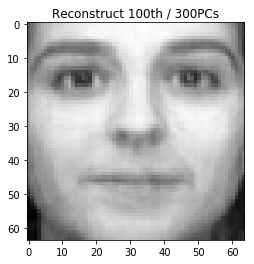

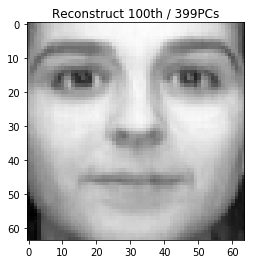

In [41]:
########## Reconstruct random face using the first 5, 10, 25, 50, 100, 200, 300, 399  PCs ###########

displaytimes=[5, 10, 25, 50, 100, 200, 300, 399]
for time in displaytimes:
    recontime2 = time
    reconface2 = np.zeros(4096,dtype=np.float)
    for i in range(recontime2):
            reconface2 += np.sum(centerfaces[99] * eigvectors_top[:, i]) * eigvectors_top[:, i]
    reconface2 *= 255
    reconface2 += meanface
    displayoneface(reconface2, 'Reconstruct 100th / '+str(time)+'PCs')
plt.show()

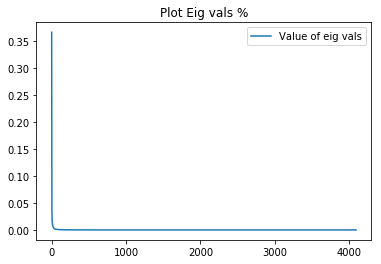

In [47]:
######### Plot proportion of variance of all the PCs ###############

# Useful functions:
# > matplotlib.pyplot.plot(*args, **kwargs)
#   Plot lines and/or markers to the Axes.
# > matplotlib.pyplot.show(*args, **kw)
#   Display a figure.
#   When running in ipython with its pylab mode,
#   display all figures and return to the ipython prompt.

eigvalsum=np.sum(eigvals_top)
plt.plot(range(4096),eigvals_top/eigvalsum)
plt.title('Plot Eig vals %')
plt.legend(['Value of eig vals'])

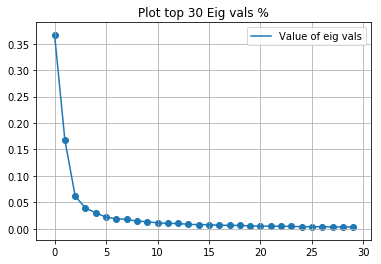

In [58]:
plotto=30
plt.plot(range(plotto),eigvals_top[0:plotto]/eigvalsum)
plt.scatter(range(plotto),eigvals_top[0:plotto]/eigvalsum)
plt.title('Plot top '+str(plotto)+' Eig vals %')
plt.legend(['Value of eig vals'])
plt.grid(True)
plt.show()